In [2]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

box_DIR = "../data/box/"
img_DIR_P = "../data/images/players/"
fig_DIR = "../figs/players/"

In [3]:
season = 2024
df1 = pd.read_parquet(box_DIR + f"NBA_Box_P_Base_{season}.parquet")
df1["GAME_DATE"] = pd.to_datetime(df1["GAME_DATE"])

In [4]:
df1g = df1.groupby(["PLAYER_ID","PLAYER_NAME"])
keys = list(df1g.groups)
dfa = []
for key in keys:
    df2 = df1g.get_group(key)
    df2["ct"] = (df2["FG3A"] >0) & (df2["FG3M"] == 0)
    df2 = df2.sort_values("GAME_DATE")
    m = df2.ct
    df2['Games'] = (m.groupby([m, (~m).cumsum().where(m)]).cumcount().add(1).mul(m))
    df2['Games'] = df2['Games'].fillna(0)
    df2['Games'] = df2['Games'].astype(int)
    # df2 = df2.sort_values("Games").tail(1)
    dfa.append(df2)
df3 = pd.concat(dfa)

In [11]:
df3[["PLAYER_NAME","FG3M","FG3A","GAME_DATE"]].query("PLAYER_NAME == 'Bam Adebayo'").query("GAME_DATE >= '2024-12-20'")

,PLAYER_NAME,FG3M,FG3A,GAME_DATE
8712,Bam Adebayo,0,1,2024-12-20
8785,Bam Adebayo,0,4,2024-12-21
9354,Bam Adebayo,0,2,2024-12-23
9586,Bam Adebayo,0,1,2024-12-26
9971,Bam Adebayo,0,2,2024-12-28
10051,Bam Adebayo,0,1,2024-12-29
10472,Bam Adebayo,0,2,2025-01-01
10698,Bam Adebayo,0,1,2025-01-02
10962,Bam Adebayo,0,1,2025-01-04
11304,Bam Adebayo,1,5,2025-01-06


In [ ]:
df4 = df3[["PLAYER_ID","PLAYER_NAME","Games"]]
df4 = df4.sort_values("Games",ascending=False).head(15).reset_index(drop=True)

GT(_tbl_data=    index PLAYER_ID         PLAYER_NAME  Games
0       1    201963    Christian Eyenga      7
1       2      2440         Matt Barnes      7
2       3    201155      Rodney Stuckey      6
3       4    200769       Shannon Brown      6
4       5    201584        Courtney Lee      6
5       6    201566   Russell Westbrook      6
6       7    200826          J.J. Barea      6
7       8      2240      Gilbert Arenas      6
8       9    202333        Xavier Henry      6
9      10    101108          Chris Paul      6
10     11      2772        Trevor Ariza      6
11     12    101179        Ronnie Price      6
12     13      2047  Quentin Richardson      5
13     14    201961     Wayne Ellington      5
14     15    201954     Darren Collison      5, _body=<great_tables._gt_data.Body object at 0x0000011C65AE69C0>, _boxhead=Boxhead([ColInfo(var='index', type=<ColInfoTypeEnum.default: 1>, column_label='#', column_align='center', column_width=None), ColInfo(var='PLAYER_ID', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='center', column_width=None), ColInfo(var='PLAYER_NAME', type=<ColInfoTypeEnum.default: 1>, column_label='Name', column_align='left', column_width=None), ColInfo(var='Games', type=<ColInfoTypeEnum.default: 1>, column_label='Games', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000011C6FB52F90>, _spanners=Spanners([]), _heading=Heading(title=Md(text='**Consecutive Games with Missing All 3 Point Shots**'), subtitle=Md(text='2010-11 NBA Season, Min 1 3PA in a game'), preheader=None), _stubhead=None, _source_notes=['bsky:@sradjoker.cc | x:@SravanNBA | source: nba.com/stats'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x0000011C6F5DDC40>, _formats=[<great_tables._gt_data.FormatInfo object at 0x0000011C6F5DE360>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='floralwhite'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['Consolas']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value=10), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=Options
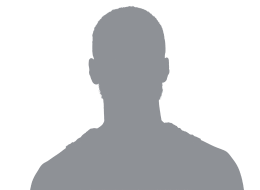
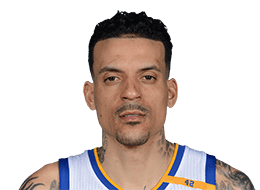
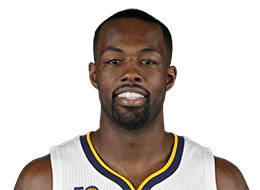
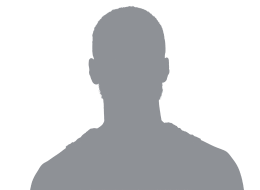
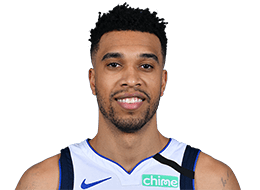
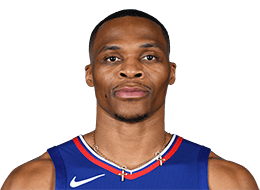
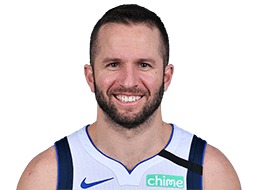
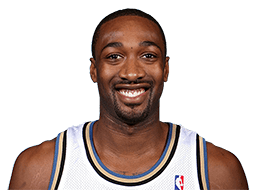
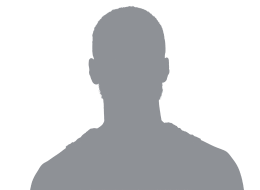
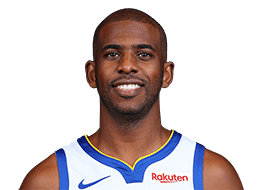
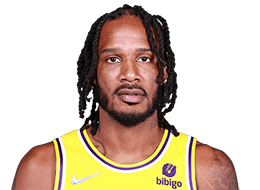
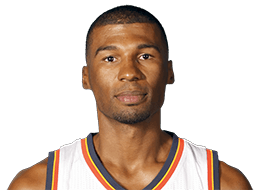
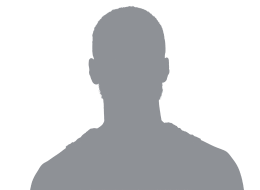
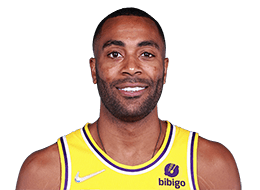
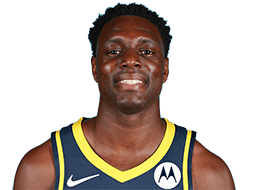

In [ ]:
data = df4.reset_index()
data["PLAYER_ID"] = data["PLAYER_ID"].astype(str)
data["index"] +=1
t = (
        GT(data)
        .tab_header(
            title = md("**Consecutive Games with Missing All 3 Point Shots**"),
            subtitle = md(f"{get_ss(season)} NBA Season, Min 1 3PA in a game")  
        )
        .tab_source_note(source_note="bsky:@sradjoker.cc | x:@SravanNBA | source: nba.com/stats")
        .cols_label(
            index = "#",
            PLAYER_ID = "",
            PLAYER_NAME = "Name",

        )
        .fmt_image(
            columns="PLAYER_ID",
            path = img_DIR_P,
            file_pattern="{}.png"
        )
        .cols_align(align="center")
        .cols_align(align="left", columns="PLAYER_NAME")
        .tab_options(
            heading_title_font_size="150%",
            heading_subtitle_font_size="110%",
            # heading_title_font_weight='bold',
            table_background_color="floralwhite",
            column_labels_font_size="105%",
            column_labels_font_weight='bold',
            row_group_font_weight='bold',
            row_group_background_color="#E5E1D8",
            table_font_size=10,
            table_font_names="Consolas", 
            data_row_padding = "0.5px",
            # table_margin_left = 7,
            # table_margin_right = 0,
        )
    )
# t.save(fig_DIR + f"ThreePoint_Missing_Streaks_{season}.png",scale=3,web_driver="firefox")
t